In [ ]:

#Plotting Equations 
x = np.linspace(-5,5,100)

# the function, which is y = x^3 here
y = x+ 12 # y = x+ 12

y = x**3 + 2*x**2  - 3*x + 2 # y =  x^3 + 2x^2 - 3x + 2
y = x**2 + 3*x + 2 # y = x^2 + 3x + 2

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.scatter(x,y)

# plot the function
plt.plot(x,y, 'g')
plt.plot(x,x, 'blue')
    

In [ ]:
import math
import matplotlib.patches as patches
import pylab
pp=midpoints
cent=(sum([p[0] for p in pp])/len(pp),sum([p[1] for p in pp])/len(pp))
# sort by polar angle
pp.sort(key=lambda p: math.atan2(p[1]-cent[1],p[0]-cent[0]))
# plot points
pylab.scatter([p[0] for p in pp],[p[1] for p in pp], color = 'purple', s=50)
# plot polyline
decisionline = LineString(pp)
plt.plot(*decisionline.coords.xy, linewidth=1.0, color = "lime",alpha = 0.5)
#print(decisionline)
pylab.gca().add_patch(patches.Polygon(pp,closed=False,fill=False))
pylab.grid()
pylab.show()

In [ ]:


def alpha_shape(points, alpha, only_outer=True):
    """
    Compute the alpha shape (concave hull) of a set of points.
    :param points: np.array of shape (n,2) points.
    :param alpha: alpha value.
    :param only_outer: boolean value to specify if we keep only the outer border
    or also inner edges.
    :return: set of (i,j) pairs representing edges of the alpha-shape. (i,j) are
    the indices in the points array.
    """
    assert points.shape[0] > 3, "Need at least four points"

    def add_edge(edges, i, j):
        """
        Add a line between the i-th and j-th points,
        if not in the list already
        """
        if (i, j) in edges or (j, i) in edges:
            # already added
            assert (j, i) in edges, "Can't go twice over same directed edge right?"
            if only_outer:
                # if both neighboring triangles are in shape, it's not a boundary edge
                edges.remove((j, i))
            return
        edges.add((i, j))

    tri = Delaunay(points)
    edges = set()
    # Loop over triangles:
    # ia, ib, ic = indices of corner points of the triangle
    for ia, ib, ic in tri.vertices:
        pa = points[ia]
        pb = points[ib]
        pc = points[ic]
        # Computing radius of triangle circumcircle
        # www.mathalino.com/reviewer/derivation-of-formulas/derivation-of-formula-for-radius-of-circumcircle
        a = np.sqrt((pa[0] - pb[0]) ** 2 + (pa[1] - pb[1]) ** 2)
        b = np.sqrt((pb[0] - pc[0]) ** 2 + (pb[1] - pc[1]) ** 2)
        c = np.sqrt((pc[0] - pa[0]) ** 2 + (pc[1] - pa[1]) ** 2)
        s = (a + b + c) / 2.0
        area = np.sqrt(s * (s - a) * (s - b) * (s - c))
        circum_r = a * b * c / (4.0 * area)
        if circum_r < alpha:
            add_edge(edges, ia, ib)
            add_edge(edges, ib, ic)
            add_edge(edges, ic, ia)
    return edges

In [ ]:
from matplotlib.pyplot import *

# Constructing the input point data
np.random.seed(0)
x = 3.0 * np.random.rand(2000)
y = 2.0 * np.random.rand(2000) - 1.0
inside = ((x ** 2 + y ** 2 > 1.0) & ((x - 3) ** 2 + y ** 2 > 1.0) & ((x - 1.5) ** 2 + y ** 2 > 0.09))
points = np.vstack([x[inside], y[inside]]).T

# Computing the alpha shape
edges = alpha_shape(points, alpha=0.2, only_outer=True)

# Plotting the output
figure()
axis('equal')
#plot(points[:, 0], points[:, 1], '.')
for i, j in edges:
    #print(points[[i, j], 0], points[[i, j], 1])
    plot(points[[i, j], 0], points[[i, j], 1])
show()

In [ ]:
# Conace hull testing removed for neatness
points = np.array([[0, 0], [0, 0.75],[0.4, 0.9] , [1, 1] , [1, 2]]) #

tri = Delaunay(points)

c = [Point(coord[0], coord[1]) for coord in points]
hull, v = alpha_shape(c,1.1)
print(hull)

fig, axs = plt.subplots()   
plt.plot(*hull.exterior.xy,c='darkmagenta', alpha=0.5)
axs.fill(*hull.exterior.xy, alpha=0.7, fc='slateblue', ec='none')
#plt.show() 
from scipy.spatial import ConvexHull, convex_hull_plot_2d
stretchCoef = 1.2
hull = ConvexHull(points[:, [0, 1]])
plt.scatter(points[:,0], points[:,1], c='darkmagenta')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
plt.show() 

In [ ]:

#Scaling
from shapely.affinity import scale
from shapely.ops import transform
from shapely.geometry import Polygon

def reflection(x0):
    return lambda x, y: (2*x0 - x, y)

P = Polygon([[0, 0], [1, 1], [1, 2], [0, 1]])
print(P)
#POLYGON ((0 0, 1 1, 1 2, 0 1, 0 0))

Q1 = scale(P, xfact = -1, origin = (1, 0))
QS = scale(P,2, origin = (1, 0))
Q2 = transform(reflection(1), P)

print(Q1)
#POLYGON ((2 0, 1 1, 1 2, 2 1, 2 0))
print(Q2)
#POLYGON ((2 0, 1 1, 1 2, 2 1, 2 0))
fig, axs = plt.subplots() 
plt.plot(*P.exterior.xy,c='pink', alpha=0.5)
plt.plot(*Q1.exterior.xy,c='royalblue', alpha=0.5)
plt.plot(*Q2.exterior.xy,c='green', alpha=0.5)
plt.plot(*QS.exterior.xy,c='purple', alpha=0.5)

In [ ]:
#get line point intersection
from shapely.geometry import LineString, Point
line = LineString([(0, 0), (5, 7), (12, 6)])  # geometry2
list(line.coords)
p = Point(4,8)  # geometry1
list(p.coords)
p.distance(line)
1.4142135623730951
# Length along line that is closest to the point
print(line.project(p))

# Now combine with interpolated point on line
np = line.interpolate(line.project(p))
print(np)  # POINT (5 7)

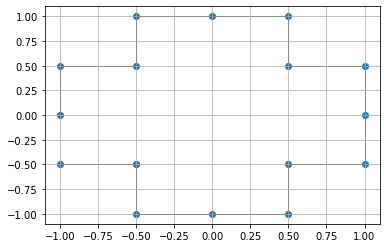

In [1]:


import math
import matplotlib.patches as patches
import pylab
pp=[(-0.500000050000005, -0.5), (-0.499999950000005, 0.5), (-0.500000100000005, -1.0), (-0.49999990000000505, 1.0), (0.500000050000005, -0.5), (-1.0000000250000025, -0.5), (1.0000000250000025, -0.5), (0.499999950000005, 0.5), (-0.9999999750000024, 0.5), (0.9999999750000024, 0.5), (0.500000100000005, -1.0), (0.49999990000000505, 1.0), (-1.0, 0.0), (-0.0, -1.0), (0.0, 1.0), (1.0, 0.0), (-0.500000050000005, -0.5)]
# compute centroid
cent=(sum([p[0] for p in pp])/len(pp),sum([p[1] for p in pp])/len(pp))
# sort by polar angle
pp.sort(key=lambda p: math.atan2(p[1]-cent[1],p[0]-cent[0]))
# plot points
pylab.scatter([p[0] for p in pp],[p[1] for p in pp])
# plot polyline
pylab.gca().add_patch(patches.Polygon(pp,closed=False,fill=False))
pylab.grid()
pylab.show()

In [1]:
def sort_to_form_line(unsorted_list):
    """
    Given a list of neighboring points which forms a line, but in random order, 
    sort them to the correct order.
    IMPORTANT: Each point must be a neighbor (8-point sense) 
    to a least one other point!
    """
    sorted_list = [unsorted_list.pop(0)]

    while len(unsorted_list) > 0:
        i = 0
        while i < len(unsorted_list):
            if are_neighbours(sorted_list[0], unsorted_list[i]):
                #neighbours at front of list
                sorted_list.insert(0, unsorted_list.pop(i))
            elif are_neighbours(sorted_list[-1], unsorted_list[i]):
                #neighbours at rear of list
                sorted_list.append(unsorted_list.pop(i))
            else:
                i = i+1

    return sorted_list

def are_neighbours(pt1, pt2):
    """
    Check if pt1 and pt2 are neighbours, in the 8-point sense
    pt1 and pt2 has integer coordinates
    """
    return (np.abs(pt1[0]-pt2[0]) < 2) and (np.abs(pt1[1]-pt2[1]) < 2)